In [15]:
import requests
import pandas as pd
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
import sqlite3

In [3]:
year_val = {
'England and Wales: before 1900': 1,
'England and Wales: 1900-1929': 3,
'England and Wales: 1930-1949': 4,
'England and Wales: 1950-1966': 5,
'England and Wales: 1967-1975': 6,
'England and Wales: 1976-1982': 7,
'England and Wales: 1983-1990': 8,
'England and Wales: 1991-1995': 9,
'England and Wales: 1996-2002': 10,
'England and Wales: 2003-2006': 11,
'England and Wales: 2007-2011': 12,
'England and Wales: 2012 onwards': 12,
}

# Read in output file from Year Built Estimate code
con = sqlite3.connect('cda.db')
cur = con.cursor()

# Create an ouput file from running the Year Built Estimate code
# - Do this


output = pd.read_csv('CH1_ybe.csv')
output['year_val'] = output['construction-age-band'].apply(lambda x: float(year_val[x]))

geometry = [Point(xy) for xy in zip(output.X_COORDINATE.values, output.Y_COORDINATE.values)]

gdf = gpd.GeoDataFrame(output,geometry = geometry)

gdf = gdf.set_crs("EPSG:27700")

gdf = gdf.to_crs("EPSG:4326")

#
#hmap = folium.Map(location=[42.5, -75.5], zoom_start=7, ), 
x_vals = [i.x for i in gdf.geometry]
y_vals = [i.y for i in gdf.geometry]

hmap = folium.Map(location = [53.19416973590628, -2.88402411532072],zoom_start=13)

hm_wide = HeatMap( list(zip(y_vals,x_vals, gdf.year_val.values)),
                   min_opacity=0.2,
                   radius=10, blur=15,
                   max_zoom=1
                 )
hmap.add_child(hm_wide)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (35,37,131) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
gdf.head()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 1,UPRN,UDPRN,ADDRESS,BUILDING_NUMBER,THOROUGHFARE_NAME,POST_TOWN,POSTCODE,...,construction-age-band,lodgement-datetime,tenure,fixed-lighting-outlets-count,low-energy-fixed-light-count,uprn,uprn-source,construction-age-band-estimated,year_val,geometry
0,0,0,DPA,100010010286,4569421,"32, EGERTON STREET, CHESTER, CH1 3ND",32.0,EGERTON STREET,CHESTER,CH1 3ND,...,England and Wales: 1900-1929,2013-07-16 17:32:43,owner-occupied,11.0,10.0,1.000100e+11,Address Matched,False,3.0,POINT (-2.88402 53.19417)
1,1,1,DPA,10000083323,27540680,"123, QUEENS ROAD, CHESTER, CH1 3BF",123.0,QUEENS ROAD,CHESTER,CH1 3BF,...,England and Wales: 2003-2006,2009-12-13 11:05:18,rental (private),NaN,NaN,1.000008e+10,Address Matched,False,11.0,POINT (-2.87749 53.19481)
2,3,3,DPA,100010033172,4572490,"56, WAVERTREE ROAD, CHESTER, CH1 5AE",56.0,WAVERTREE ROAD,CHESTER,CH1 5AE,...,England and Wales: 1950-1966,2014-10-06 17:04:24,owner-occupied,13.0,1.0,1.000100e+11,Address Matched,False,5.0,POINT (-2.93603 53.20667)
3,4,4,DPA,200000832828,4580448,"THE OLD BARN, LEA HALL, DEMAGE LANE, LEA-BY-BA...",NaN,LEA-BY-BACKFORD,CHESTER,CH1 6NU,...,England and Wales: before 1900,2008-11-04 16:24:16,rental (private),NaN,NaN,2.000008e+11,Address Matched,False,1.0,POINT (-2.91188 53.23604)
4,7,7,DPA,100010035271,4577747,"82, WORDSWORTH CRESCENT, BLACON, CHESTER, CH1 5UE",82.0,WORDSWORTH CRESCENT,CHESTER,CH1 5UE,...,England and Wales: 1967-1975,2011-11-28 15:56:50,rental (social),13.0,1.0,1.000100e+11,Address Matched,False,6.0,POINT (-2.91139 53.20817)


In [7]:
gdf['property-type'].unique()

array(['House', 'Flat', 'Bungalow', 'Maisonette', nan], dtype=object)

In [5]:
for i in gdf.columns:
    print(i)

Unnamed: 0
Unnamed: 0_x
Unnamed: 1
UPRN
UDPRN
ADDRESS
BUILDING_NUMBER
THOROUGHFARE_NAME
POST_TOWN
POSTCODE
RPC
X_COORDINATE
Y_COORDINATE
STATUS
LOGICAL_STATUS_CODE
CLASSIFICATION_CODE
CLASSIFICATION_CODE_DESCRIPTION
LOCAL_CUSTODIAN_CODE
LOCAL_CUSTODIAN_CODE_DESCRIPTION
POSTAL_ADDRESS_CODE
POSTAL_ADDRESS_CODE_DESCRIPTION
BLPU_STATE_CODE
BLPU_STATE_CODE_DESCRIPTION
TOPOGRAPHY_LAYER_TOID
LAST_UPDATE_DATE
ENTRY_DATE
BLPU_STATE_DATE
LANGUAGE
MATCH
MATCH_DESCRIPTION
DEPENDENT_LOCALITY
SUB_BUILDING_NAME
BUILDING_NAME
DEPENDENT_THOROUGHFARE_NAME
PARENT_UPRN
ORGANISATION_NAME
PO_BOX_NUMBER
DEPARTMENT_NAME
Unnamed: 0_y
lmk-key
address1
address2
address3
postcode
building-reference-number
current-energy-rating
potential-energy-rating
current-energy-efficiency
potential-energy-efficiency
property-type
built-form
inspection-date
local-authority
constituency
county
lodgement-date
transaction-type
environment-impact-current
environment-impact-potential
energy-consumption-current
energy-consumption-po

<AxesSubplot:>

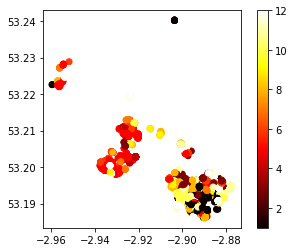

In [9]:
## Split by housing type

flats = gdf[gdf['property-type']=='Flat']

flats.plot(column = 'year_val', cmap='hot', legend = True)

<AxesSubplot:>

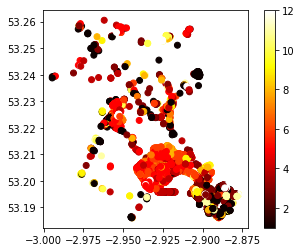

In [10]:
houses = gdf[gdf['property-type']=='House']

houses.plot(column = 'year_val', cmap='hot', legend = True)

In [ ]:
## Change data format to the OS Feature tiles

In [21]:
## Retrieve a bounding box from the Local Authority shapefile

# wfs_endpoint = ('https://ons-inspire.esriuk.com/arcgis/services/Administrative_Boundaries'
#                 '/Local_Authority_Districts_May_2020_Boundaries_UK_BFE/MapServer/WFSServer?')

wfs_endpoint = ('https://ons-inspire.esriuk.com/arcgis/rest/services/Administrative_Boundaries'
                '/Local_Authority_Districts_December_2009_Boundaries/FeatureServer')

# Define WFS parameters 
service = 'wfs'
request = 'GetFeature'
version = '2.0.0'
typeNames = ('https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-december-2009-boundaries?layer=0')
outputFormat = 'GEOJSON'
srsName = 'EPSG:4326'
# Define attribute-based filter using OGC WFS filter encoding specification
# Filter specifies the Government Statistical Service (GSS) Code for the Chester and West Cheshire local authority district area
filter = ('<ogc:Filter>'
              '<ogc:PropertyIsEqualTo>'
                  '<ogc:PropertyName>lad09cd</ogc:PropertyName>'
                  '<ogc:Literal>00EW</ogc:Literal>'
              '</ogc:PropertyIsEqualTo>'
          '</ogc:Filter>')

# Represent WFS parameters in a dictionary and collapse OGC filter into a single line
params_wfs = {'service':service,
              'request':request,
              'version':version,
              'typeNames':typeNames,
              'outputFormat':outputFormat,
              'srsName':srsName,
              'filter':filter}

# Make HTTP GET request and raise exception if request was unsuccessful
# Turn off verification to remove the need to whitelist certificate
try:
    r = requests.get(wfs_endpoint, params=params_wfs)
    r.raise_for_status()
except requests.exceptions.RequestException as e:
    print(e)

# Decode JSON payload returned by request    
payload = r.json()

# Define coordinate reference system (CRS) codes
# WGS 84
WGS84 = 'epsg:4326'
# British National Grid
BNG = 'epsg:27700'

# Transform GeoJSON features into a GeoPandas GeoDataFrame
gdf_boundary = gpd.GeoDataFrame.from_features(payload['features'], crs=WGS84)

# Obtain polygon centroid point geometry
boundary_centroid = gdf_boundary['geometry'].centroid

# Obtain x and y coordinates of centroid point geometry
x = boundary_centroid.x
y = boundary_centroid.y

# Obtain bounds of polygon geometry
bounds = gdf_boundary['geometry'][0].bounds

# Define a OGC WFS filter compliant bounding box for the polygon geometry
# bottom-left y, bottom-left x, top-right y, top-right x
bbox = str(bounds[1]) + ',' + str(bounds[0]) + ',' + str(bounds[3]) + ',' + str(bounds[2])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
houses = gdf[gdf['property-type']=='House']

houses.plot(column = 'year_val', cmap='hot', legend = True)

In [12]:
hmap.save('Construction Age Band - Visualisation.html')


In [ ]:
# Varying levels of density affect the heatmap projection. Maybe plotting individual points would be better?

In [ ]:
# Heat map may not be the best visualisation--values in some areas may obfuscate 